# **Data Preparation and Augmentation**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d bhanuprasanna/isic-2019

100% 9.08G/9.10G [02:00<00:00, 28.4MB/s]
100% 9.10G/9.10G [02:00<00:00, 81.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/isic-2019.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Skin Cancer Dataset Preprocessing

# Import the libraries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
# Check how many training images are in each folder
print("Training Images:")
print(len(os.listdir('/content/ISIC - 2019/train/Actinic keratosis')))
print(len(os.listdir('/content/ISIC - 2019/train/Basal cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Benign keratosis')))
print(len(os.listdir('/content/ISIC - 2019/train/Dermatofibroma')))
print(len(os.listdir('/content/ISIC - 2019/train/Melanocytic nevus')))
print(len(os.listdir('/content/ISIC - 2019/train/Melanoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Squamous cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Vascular lesion')))

# Check how many test images are in each folder
print("Test Images:")
print(len(os.listdir('/content/ISIC - 2019/test/Actinic keratosis')))
print(len(os.listdir('/content/ISIC - 2019/test/Basal cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/test/Benign keratosis')))
print(len(os.listdir('/content/ISIC - 2019/test/Dermatofibroma')))
print(len(os.listdir('/content/ISIC - 2019/test/Melanocytic nevus')))
print(len(os.listdir('/content/ISIC - 2019/test/Melanoma')))
print(len(os.listdir('/content/ISIC - 2019/test/Squamous cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/test/Vascular lesion')))

# Check how many validation images are in each folder
print("Test Images:")
print(len(os.listdir('/content/ISIC - 2019/val/Actinic keratosis')))
print(len(os.listdir('/content/ISIC - 2019/val/Basal cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/val/Benign keratosis')))
print(len(os.listdir('/content/ISIC - 2019/val/Dermatofibroma')))
print(len(os.listdir('/content/ISIC - 2019/val/Melanocytic nevus')))
print(len(os.listdir('/content/ISIC - 2019/val/Melanoma')))
print(len(os.listdir('/content/ISIC - 2019/val/Squamous cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/val/Vascular lesion')))

Training Images:
716
2820
2215
206
10979
3812
541
202
Test Images:
75
250
203
11
965
360
42
24
Test Images:
76
253
206
22
931
350
45
27


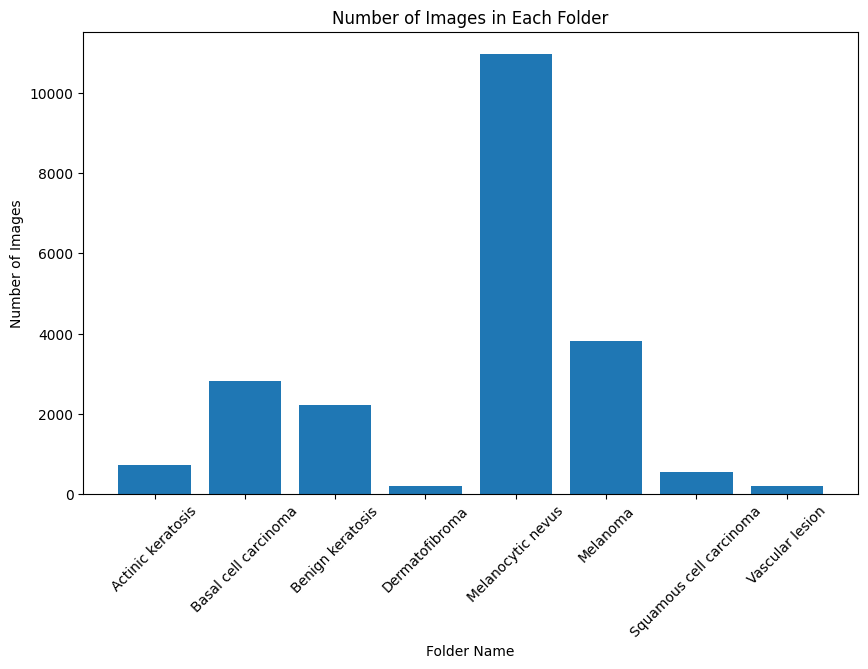

In [ ]:
import os
import matplotlib.pyplot as plt

# List of folder paths
folders = [
    '/content/ISIC - 2019/train/Actinic keratosis',
    '/content/ISIC - 2019/train/Basal cell carcinoma',
    '/content/ISIC - 2019/train/Benign keratosis',
    '/content/ISIC - 2019/train/Dermatofibroma',
    '/content/ISIC - 2019/train/Melanocytic nevus',
    '/content/ISIC - 2019/train/Melanoma',
    '/content/ISIC - 2019/train/Squamous cell carcinoma',
    '/content/ISIC - 2019/train/Vascular lesion'
]

# Get the number of images in each folder
num_images = [len(os.listdir(folder)) for folder in folders]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([folder.split('/')[-1] for folder in folders], num_images)
plt.xlabel('Folder Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [ ]:
# Augment the data
# Class 'nv' is not going to be augmented
class_list = ['Actinic keratosis', 'Basal cell carcinoma', 'Benign keratosis', 'Dermatofibroma', 'Melanoma', 'Squamous cell carcinoma']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('/content/ISIC - 2019/train/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('/content/ISIC - 2019/train/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/ISIC - 2019/train/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 10000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 10000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 716 images belonging to 1 classes.
Found 2820 images belonging to 1 classes.
Found 2215 images belonging to 1 classes.
Found 206 images belonging to 1 classes.
Found 3812 images belonging to 1 classes.
Found 541 images belonging to 1 classes.


In [ ]:
# Augment the data
# Class 'nv' is not going to be augmented
class_list = ['Vascular lesion']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('/content/ISIC - 2019/train/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('/content/ISIC - 2019/train/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/ISIC - 2019/train/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 10000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 10000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 202 images belonging to 1 classes.


In [ ]:
# Check how many training images are in each folder
print("Training Images:")
print(len(os.listdir('/content/ISIC - 2019/train/Actinic keratosis')))
print(len(os.listdir('/content/ISIC - 2019/train/Basal cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Benign keratosis')))
print(len(os.listdir('/content/ISIC - 2019/train/Dermatofibroma')))
print(len(os.listdir('/content/ISIC - 2019/train/Melanocytic nevus')))
print(len(os.listdir('/content/ISIC - 2019/train/Melanoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Squamous cell carcinoma')))
print(len(os.listdir('/content/ISIC - 2019/train/Vascular lesion')))

Training Images:
9608
9960
9910
8290
10979
9974
9888
8130


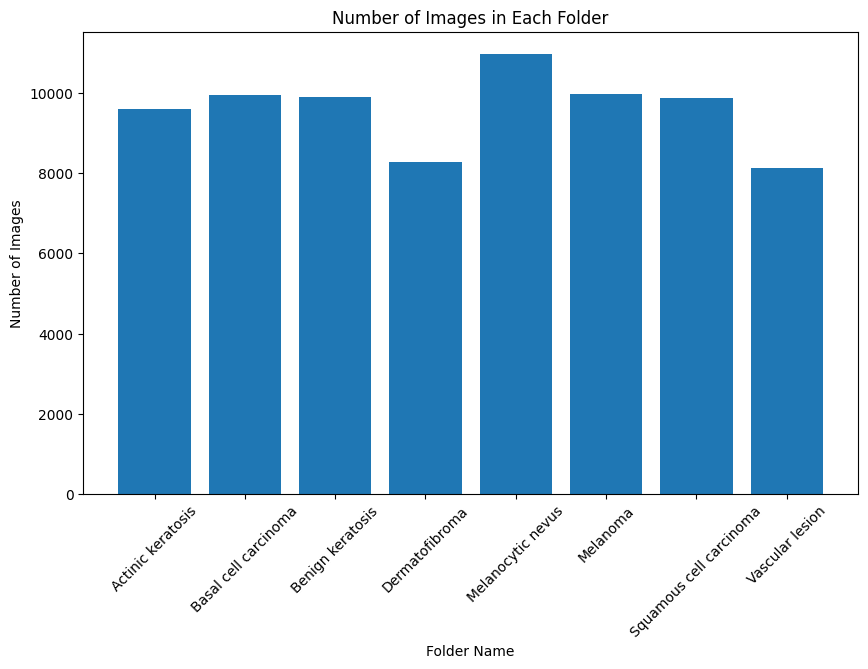

In [ ]:
import os
import matplotlib.pyplot as plt

# List of folder paths
folders = [
    '/content/ISIC - 2019/train/Actinic keratosis',
    '/content/ISIC - 2019/train/Basal cell carcinoma',
    '/content/ISIC - 2019/train/Benign keratosis',
    '/content/ISIC - 2019/train/Dermatofibroma',
    '/content/ISIC - 2019/train/Melanocytic nevus',
    '/content/ISIC - 2019/train/Melanoma',
    '/content/ISIC - 2019/train/Squamous cell carcinoma',
    '/content/ISIC - 2019/train/Vascular lesion'
]

# Get the number of images in each folder
num_images = [len(os.listdir(folder)) for folder in folders]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([folder.split('/')[-1] for folder in folders], num_images)
plt.xlabel('Folder Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Define the path to the folder you want to zip
folder_to_zip = '/content/ISIC - 2019'

# Define the name of the resulting zip file (including the .zip extension)
zip_filename = '/content/drive/MyDrive/DATA SET/augmentedDataISIC2019.zip'

# Create a new zip file and add the folder contents to it
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for foldername, subfolders, filenames in os.walk(folder_to_zip):
        for filename in filenames:
            filepath = os.path.join(foldername, filename)
            arcname = os.path.relpath(filepath, folder_to_zip)
            zipf.write(filepath, arcname)

print(f'{zip_filename} has been created.')

/content/drive/MyDrive/DATA SET/augmentedDataISIC2019.zip has been created.
